In [1]:
#数据生成器
from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 227

validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/ChineseStyle/test',
                                                                                target_size=(IMSIZE, IMSIZE),
                                                                                batch_size=200,
                                                                                class_mode='categorical'
                                                                                )

train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/ChineseStyle/train',
                                                                           target_size=(IMSIZE, IMSIZE),
                                                                           batch_size=200,
                                                                           class_mode='categorical'
                                                                           )

Using TensorFlow backend.


Found 5526 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


<Figure size 432x288 with 0 Axes>

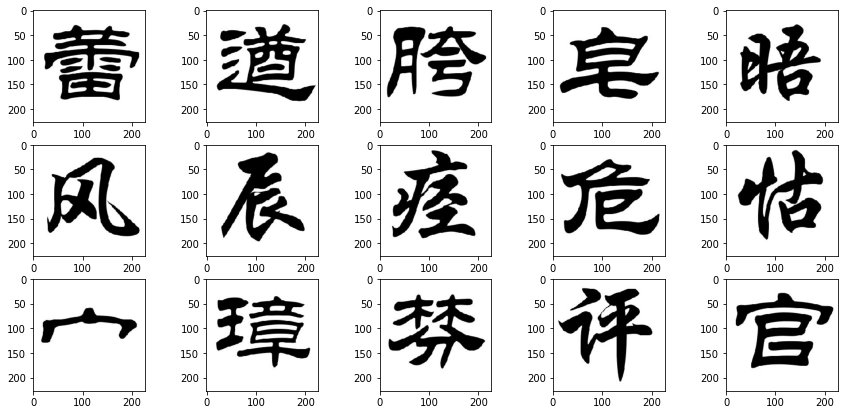

In [2]:
#图像显示

from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(3, 5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(15): ax[i].imshow(X[i, :, :, :, ])

In [4]:
#AlexNet模型构建
from keras.layers import Activation, Conv2D, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D
from keras import Model

input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x = Conv2D(96, [11, 11], strides=[4, 4], activation='relu')(x)
x = MaxPooling2D([3, 3], strides=[2, 2])(x)
x = Conv2D(256, [5, 5], padding="same", activation='relu')(x)
x = MaxPooling2D([3, 3], strides=[2, 2])(x)
x = Conv2D(384, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(384, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D([3, 3], strides=[2, 2])(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       885120    
___________________________________________

In [ ]:
#AlexNet模型编译与拟合
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20
39/40 [============================>.] - ETA: 4s - loss: 1.0167 - accuracy: 0.5219